The data provided by STEG is composed of two files. The first one is comprised of client data and the second one contains billing history from 2005 to 2019.

## Features:

### Client:

- Client_id: Unique id for client
- District: District where the client is
- Client_catg: Category client belongs to
- Region: Area where the client is
- Creation_date: Date client joined
- Target: fraud:1 , not fraud: 0


### Invoice data

- Client_id: Unique id for the client
- Invoice_date: Date of the invoice
- Tarif_type: Type of tax
- Counter_number:
- Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
- Counter_code:
- Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
- Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
- Consommation_level_1: Consumption_level_1
- Consommation_level_2: Consumption_level_2
- Consommation_level_3: Consumption_level_3
- Consommation_level_4: Consumption_level_4
- Old_index: Old index
- New_index: New index
- Months_number: Month number
- Counter_type: Type of counter

In [1]:
# imports
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# train data
path1 = "data/train/client_train.csv"
path2 = "data/train/invoice_train.csv"

# test data
path3 = "data/test/client_test.csv"
path4 = "data/test/invoice_test.csv"

In [3]:
# train tables
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

In [4]:
df1.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


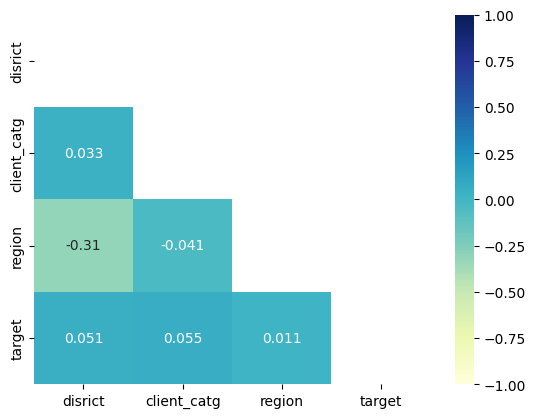

In [6]:
# Correlation heatmap 
correlations = df1.corr()
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

There are no linear correlation between the "district", "client_catg", "region".

<AxesSubplot:xlabel='target', ylabel='count'>

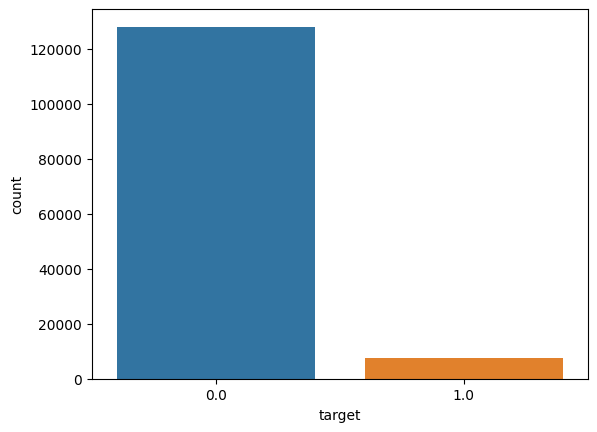

In [7]:
# Target distribution
sns.countplot(data=df1, x='target')

In [8]:
# percentage of the fraud customers
len(df1[df1['target']==1]) / len(df1)

0.05584052312665599

In [9]:
df2.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


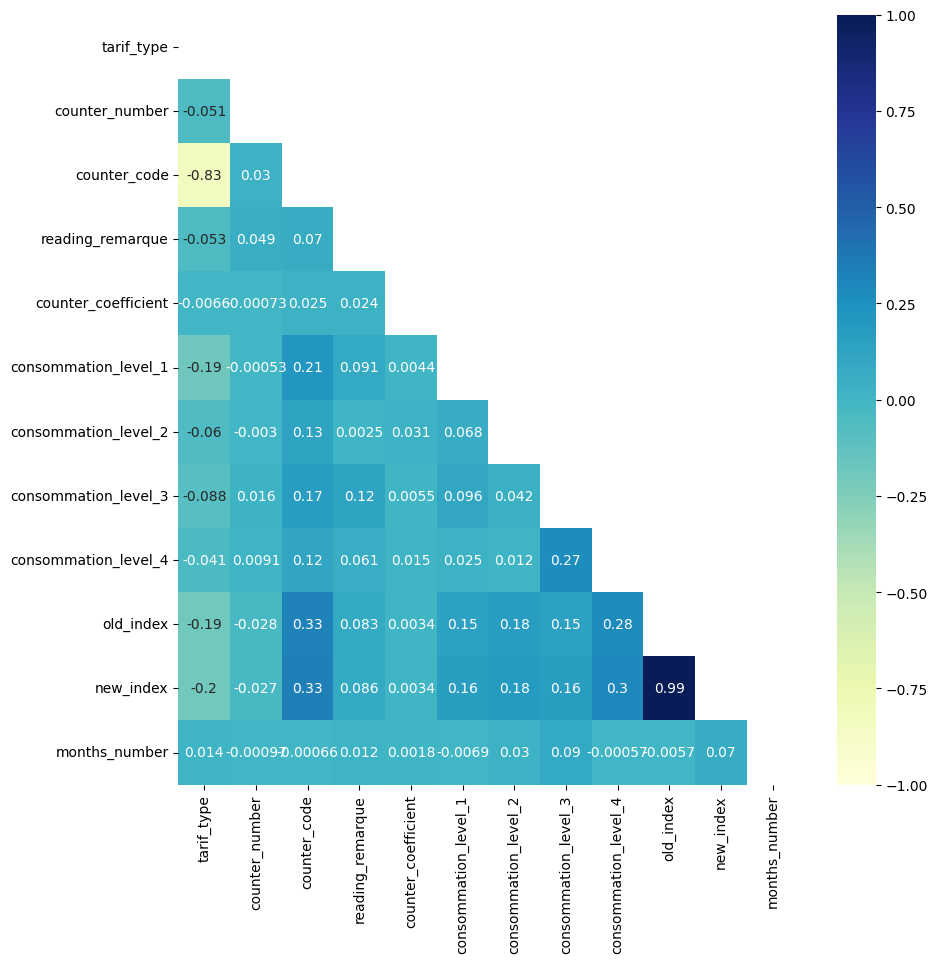

In [11]:
# Correlation heatmap 
plt.figure(figsize = [10,10])
correlations = df2.corr()
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

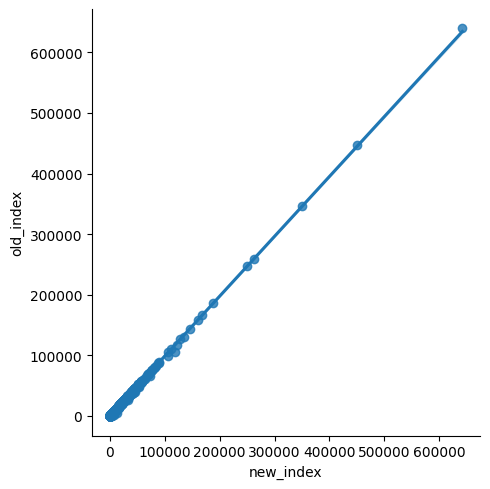

In [12]:
sns.lmplot(data= df2.sample(1000), x="new_index", y="old_index")

The "new_idex" and "old_idex" are linear correlated.

#### There are no missing values in the data

In [13]:
# Combine the two tables with Left Join
df = df_train = df1.merge(df2, left_on='client_id', right_on='client_id', how='left')
df.shape

(4476749, 21)

### Data Exploration

In [14]:
df.head(20)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
5,60,train_Client_0,11,101,31/12/1994,0.0,2017-07-17,11,1335667,0,...,9,1,314,0,0,0,15638,15952,8,ELEC
6,60,train_Client_0,11,101,31/12/1994,0.0,2018-12-07,11,1335667,0,...,9,1,541,0,0,0,15952,16493,12,ELEC
7,60,train_Client_0,11,101,31/12/1994,0.0,2019-03-19,11,1335667,0,...,9,1,585,0,0,0,16493,17078,8,ELEC
8,60,train_Client_0,11,101,31/12/1994,0.0,2011-07-22,11,1335667,0,...,9,1,1200,186,0,0,7770,9156,4,ELEC
9,60,train_Client_0,11,101,31/12/1994,0.0,2011-11-22,11,1335667,0,...,6,1,1082,0,0,0,9156,10238,4,ELEC


In [89]:
# drop the useless columns
df.drop(['creation_date', 'old_index'],axis=1, inplace=True)
df.head()

,disrict,client_id,client_catg,region,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,new_index,months_number,counter_type
0,60,train_Client_0,11,101,0.0,2014-01-24 00:03:00,11,1335667,0,203,8,1,82,0,0,0,14384,4,ELEC
1,60,train_Client_0,11,101,0.0,2013-01-29 00:03:00,11,1335667,0,203,6,1,1200,184,0,0,13678,4,ELEC
2,60,train_Client_0,11,101,0.0,2015-01-23 00:03:00,11,1335667,0,203,8,1,123,0,0,0,14747,4,ELEC
3,60,train_Client_0,11,101,0.0,2015-01-13 00:07:00,11,1335667,0,207,8,1,102,0,0,0,14849,4,ELEC
4,60,train_Client_0,11,101,0.0,2016-01-17 00:11:00,11,1335667,0,207,9,1,572,0,0,0,15638,12,ELEC


In [16]:
dfsmall = df.sample(1000)

In [17]:
df.groupby('client_id').nunique().max(axis=0)

disrict                   1
client_catg               1
region                    1
creation_date             1
target                    1
invoice_date            159
tarif_type                6
counter_number            8
counter_statue            4
counter_code              6
reading_remarque          4
counter_coefficient       4
consommation_level_1    245
consommation_level_2    189
consommation_level_3     62
consommation_level_4     68
old_index               374
new_index               373
months_number           184
counter_type              2
dtype: int64

<AxesSubplot:xlabel='invoice_date'>

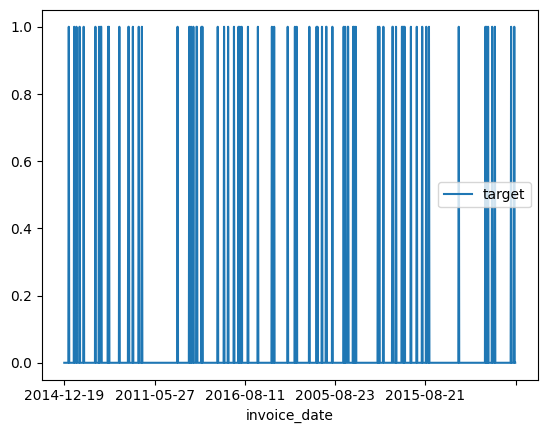

In [18]:

dfsmall[['invoice_date', 'target']].plot(kind='line',x='invoice_date')

In [19]:
df['counter_type'].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


In [21]:
# Transform the data datetype
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y-%M-%d')

In [22]:
# Check the fraud records for the invoices before 2005
df.query('invoice_date < "2005-01-01" & target ==1')

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type


In [23]:
# percentage of the fraud transactions
len(df[df['target']==1]) / len(df)

0.07887688141550933

In [24]:
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df3.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [25]:
# Combine the two tables with Left Join
df_test = df3.merge(df4, left_on='client_id', right_on='client_id', how='left')
df_test.shape

(1939730, 20)

In [26]:
# Check the fraud records for the invoices before 2005
len(df_test.query('invoice_date < "2005-01-01"'))

9357

In [31]:
dfsmall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3547257 to 3804277
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   disrict               1000 non-null   int64  
 1   client_id             1000 non-null   object 
 2   client_catg           1000 non-null   int64  
 3   region                1000 non-null   int64  
 4   creation_date         1000 non-null   object 
 5   target                1000 non-null   float64
 6   invoice_date          1000 non-null   object 
 7   tarif_type            1000 non-null   int64  
 8   counter_number        1000 non-null   int64  
 9   counter_statue        1000 non-null   object 
 10  counter_code          1000 non-null   int64  
 11  reading_remarque      1000 non-null   int64  
 12  counter_coefficient   1000 non-null   int64  
 13  consommation_level_1  1000 non-null   int64  
 14  consommation_level_2  1000 non-null   int64  
 15  consommation

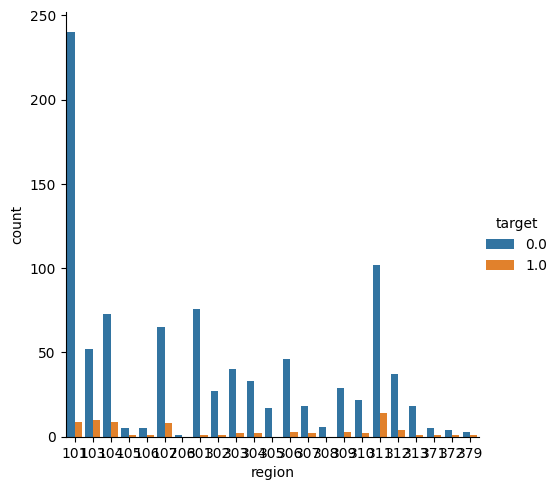

In [53]:
sns.catplot(data=dfsmall, kind='count', x='region', hue='target');

In [62]:
dfsmall[['region', 'target']].groupby('region').mean().sort_values('target')

,target
region,
305,0.000000
308,0.000000
206,0.000000
301,0.012987
302,0.035714
101,0.036145
303,0.047619
313,0.052632
304,0.057143


In [63]:
dfsmall.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

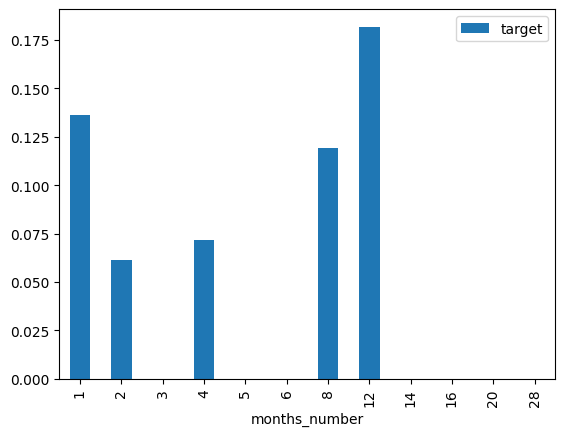

In [66]:

col = 'months_number'

dfsmall[[col, 'target']].groupby(col).mean().plot.bar();

In [70]:
sum(df['months_number'] > 12)

24041

In [76]:
mask = df['months_number'] > 25
df[mask]

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
10798,62,train_Client_10030,11,310,22/09/1998,1.0,2013-01-29 00:04:00,11,25411,0,...,8,1,6040,0,0,0,17835,23875,42,ELEC
11155,60,train_Client_100307,11,101,26/12/1981,0.0,2016-01-20 00:09:00,10,233298,0,...,8,1,0,0,0,0,41916,41916,32,ELEC
19356,60,train_Client_100520,11,101,11/10/1996,0.0,2015-01-12 00:01:00,10,86108,0,...,8,1,482,0,0,0,17641,18123,28,ELEC
20211,60,train_Client_100551,11,101,20/02/2009,0.0,2010-01-30 00:08:00,11,1099471,0,...,6,1,5,1200,10744,0,0,17815,25778,ELEC
20212,60,train_Client_100551,11,101,20/02/2009,0.0,2010-01-05 00:06:00,11,1099471,0,...,9,1,5,1200,10566,0,0,9971,17815,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458605,69,train_Client_99506,11,104,08/09/1998,0.0,2019-01-19 00:08:00,40,6873055,0,...,8,1,3116,0,0,0,4831,7947,32,GAZ
4468015,69,train_Client_99772,11,104,24/11/2004,0.0,2015-01-23 00:11:00,11,925896,0,...,8,1,3414,0,0,0,8693,12107,28,ELEC
4475499,69,train_Client_99963,11,104,03/12/1992,0.0,2014-01-17 00:07:00,11,41215,0,...,8,1,5600,2800,5600,512,51413,65925,28,ELEC
4476539,60,train_Client_99992,11,101,13/03/2009,0.0,2016-01-21 00:10:00,40,65938,0,...,6,1,0,0,0,0,0,0,26,GAZ


In [82]:
df['months_number'].value_counts()

4         3680478
8          278772
2          270909
1          113266
12          54328
           ...   
430834          1
179002          1
186166          1
81499           1
463554          1
Name: months_number, Length: 1370, dtype: int64

In [84]:
(df['months_number'] // 12).value_counts()

0        4398380
1          73283
2           2996
3            498
4            128
          ...   
36710          1
16254          1
35902          1
14916          1
38629          1
Name: months_number, Length: 1282, dtype: int64

In [85]:
sr_explore_months = pd.Series(df['months_number'], 
                              index=pd.DatetimeIndex(df['invoice_date']));

In [86]:
sr_explore_months

invoice_date
2014-01-24 00:03:00   NaN
2013-01-29 00:03:00   NaN
2015-01-23 00:03:00   NaN
2015-01-13 00:07:00   NaN
2016-01-17 00:11:00   NaN
                       ..
2005-01-19 00:08:00   NaN
2005-01-19 00:12:00   NaN
1996-01-25 00:09:00   NaN
1996-01-28 00:05:00   NaN
1996-01-25 00:01:00   NaN
Name: months_number, Length: 4476749, dtype: float64

In [87]:
df['months_number']

0           4
1           4
2           4
3           4
4          12
           ..
4476744     8
4476745     4
4476746     4
4476747     4
4476748     4
Name: months_number, Length: 4476749, dtype: int64

In [88]:
df.dtypes

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
creation_date                   object
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object